In [14]:
import json
import pathlib

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.display import HTML
from peilbeheerst_model import ParseCrossings


In [15]:
with open("waterschappen.json") as f:
    waterschap_data = json.load(f)

print_df = {}
for waterschap, waterschap_struct in waterschap_data.items():
    for funcname, func_args in waterschap_struct.items():
        if funcname not in print_df:
            print_df[funcname] = []
        print_df[funcname].append(pd.Series(func_args, name=waterschap))

for funcname, df in print_df.items():
    display(HTML(f"<h2>Function {funcname}:</h2>"))
    display(pd.DataFrame(df))

,gpkg_path,output_path,search_radius_structure,agg_peilgebieden_layer,agg_peilgebieden_column,krw_path,krw_column_id,krw_column_name,krw_min_overlap
HHNK,../../../../Data_postprocessed/Waterschappen/H...,../../../../Data_crossings/HHNK/hhnk_crossings...,60,aggregation_area,code,../../../../Data_overig/KRW/KRW_lichamen_per_w...,owmident,owmnaam,0.025
Delfland,../../../../Data_postprocessed/Waterschappen/D...,../../../../Data_crossings/Delfland/delfland_c...,60,aggregation_area,code,../../../../Data_overig/KRW/KRW_lichamen_per_w...,owmident,owmnaam,0.025
Hollandse Delta,../../../../Data_postprocessed/Waterschappen/H...,../../../../Data_crossings/Hollandse_Delta/hd_...,300,aggregation_area,code,../../../../Data_overig/KRW/KRW_lichamen_per_w...,owmident,owmnaam,0.025
AmstelGooienVecht,../../../../Data_postprocessed/Waterschappen/A...,../../../../Data_crossings/AmstelGooienVecht/a...,60,aggregation_area,code,../../../../Data_overig/KRW/KRW_lichamen_per_w...,owmident,owmnaam,0.025
HHSK,../../../../Data_postprocessed/Waterschappen/H...,../../../../Data_crossings/HHSK/hhsk_crossings...,300,aggregation_area,code,../../../../Data_overig/KRW/KRW_lichamen_per_w...,owmident,owmnaam,0.025
Rijnland,../../../../Data_postprocessed/Waterschappen/R...,../../../../Data_crossings/Rijnland/rijnland_c...,60,aggregation_area,code,../../../../Data_overig/KRW/KRW_lichamen_per_w...,owmident,owmnaam,0.025
Scheldestromen,../../../../Data_postprocessed/Waterschappen/S...,../../../../Data_crossings/Scheldestromen/sche...,60,aggregation_area,code,../../../../Data_overig/KRW/KRW_lichamen_per_w...,owmident,owmnaam,0.025
Wetterskip,../../../../Data_postprocessed/Waterschappen/W...,../../../../Data_crossings/Wetterskip/wettersk...,60,aggregation_area,code,../../../../Data_overig/KRW/KRW_lichamen_per_w...,owmident,owmnaam,0.025
WSRL,../../../../Data_postprocessed/Waterschappen/W...,../../../../Data_crossings/WSRL/wsrl_crossings...,60,aggregation_area,code,../../../../Data_overig/KRW/KRW_lichamen_per_w...,owmident,owmnaam,0.025
Zuiderzeeland,../../../../Data_postprocessed/Waterschappen/Z...,../../../../Data_crossings/Zuiderzeeland/zzl_c...,60,aggregation_area,code,../../../../Data_overig/KRW/KRW_lichamen_per_w...,owmident,owmnaam,0.025


,filterlayer,group_stacked
HHNK,duikersifonhevel,True
Delfland,duikersifonhevel,True
Hollandse Delta,duikersifonhevel,True
AmstelGooienVecht,duikersifonhevel,True
HHSK,duikersifonhevel,True
Rijnland,duikersifonhevel,True
Scheldestromen,duikersifonhevel,True
Wetterskip,duikersifonhevel,True
WSRL,duikersifonhevel,True
Zuiderzeeland,duikersifonhevel,True


In [16]:
for waterschap, waterschap_struct in waterschap_data.items():
        print(f"\n{waterschap}...")

        init_settings, crossing_settings = waterschap_struct.values()
        init_settings["logfile"] = pathlib.Path(init_settings["output_path"]).with_suffix("").with_suffix(".log")
    
        if waterschap not in ['HHNK']:
            continue
    
        # if pathlib.Path(init_settings["output_path"]).exists() and "crossings_hydroobject" in fiona.listlayers(init_settings["output_path"]):
        #     continue

        # Crossings class initializeren
        cross = ParseCrossings(**init_settings)

        # Crossings bepalen en wegschrijven
        if crossing_settings["filterlayer"] is None:
            df_hydro = cross.find_crossings_with_peilgebieden("hydroobject", **crossing_settings)
            cross.write_crossings(df_hydro)
        else:
            df_hydro, df_dsf, df_hydro_dsf = cross.find_crossings_with_peilgebieden("hydroobject", **crossing_settings)
            cross.write_crossings(df_hydro, crossing_settings["filterlayer"], df_dsf, df_hydro_dsf)



HHNK...


Snap geometries in 'hydroobject':   0%|          | 0/190044 [00:00<?, ?it/s]

Find which endpoints need to be extended:   0%|          | 0/380046 [00:00<?, ?it/s]

Move groups of endpoints away from boundary:   0%|          | 0/7623 [00:00<?, ?it/s]

Find crossings for 'hydroobject':   0%|          | 0/190044 [00:00<?, ?it/s]

  - Add water levels to crossings:   0%|          | 0/8884 [00:00<?, ?it/s]

  - Add structures of 'stuw' to crossings:   0%|          | 0/5434 [00:00<?, ?it/s]

  - Add structures of 'stuw' to crossings:   0%|          | 0/81 [00:00<?, ?it/s]

  - Add structures of 'gemaal' to crossings:   0%|          | 0/2274 [00:00<?, ?it/s]

  - Add structures of 'gemaal' to crossings:   0%|          | 0/6 [00:00<?, ?it/s]

  - Correct free water flow:   0%|          | 0/8884 [00:00<?, ?it/s]

  - Correct pumped water flow:   0%|          | 0/8884 [00:00<?, ?it/s]

  - Group geometrically stacked crossings:   0%|          | 0/8884 [00:00<?, ?it/s]

  - Correct free water flow:   0%|          | 0/8885 [00:00<?, ?it/s]

  - Correct pumped water flow:   0%|          | 0/8885 [00:00<?, ?it/s]

Snap geometries in 'duikersifonhevel':   0%|          | 0/59468 [00:00<?, ?it/s]

Find which endpoints need to be extended:   0%|          | 0/118936 [00:00<?, ?it/s]

Move groups of endpoints away from boundary:   0%|          | 0/4236 [00:00<?, ?it/s]

Find crossings for 'duikersifonhevel':   0%|          | 0/59468 [00:00<?, ?it/s]

  - Add water levels to crossings:   0%|          | 0/4682 [00:00<?, ?it/s]

  - Add structures of 'stuw' to crossings:   0%|          | 0/5434 [00:00<?, ?it/s]

  - Add structures of 'stuw' to crossings:   0%|          | 0/52 [00:00<?, ?it/s]

  - Add structures of 'gemaal' to crossings:   0%|          | 0/2274 [00:00<?, ?it/s]

  - Add structures of 'gemaal' to crossings:   0%|          | 0/8 [00:00<?, ?it/s]

  - Correct free water flow:   0%|          | 0/4682 [00:00<?, ?it/s]

  - Correct pumped water flow:   0%|          | 0/4682 [00:00<?, ?it/s]

  - Group geometrically stacked crossings:   0%|          | 0/4682 [00:00<?, ?it/s]

  - Correct free water flow:   0%|          | 0/4692 [00:00<?, ?it/s]

  - Correct pumped water flow:   0%|          | 0/4692 [00:00<?, ?it/s]

  - Add structures of 'stuw' to crossings:   0%|          | 0/17 [00:00<?, ?it/s]

  - Add structures of 'gemaal' to crossings:   0%|          | 0/2 [00:00<?, ?it/s]

  - Correct free water flow:   0%|          | 0/4692 [00:00<?, ?it/s]

  - Correct pumped water flow:   0%|          | 0/4692 [00:00<?, ?it/s]

Add double links for crossings with 'stuw' and 'gemaal':   0%|          | 0/4461 [00:00<?, ?it/s]

Aggregate links between peilgebieden:   0%|          | 0/2972 [00:00<?, ?it/s]

Assign aggregate areas:   0%|          | 0/2693 [00:00<?, ?it/s]

Disable crossings in aggregation areas:   0%|          | 0/612 [00:00<?, ?it/s]

Aggregate links between aggregate areas:   0%|          | 0/499 [00:00<?, ?it/s]

  - Add structures of 'stuw' to crossings:   0%|          | 0/1058 [00:00<?, ?it/s]

  - Add structures of 'gemaal' to crossings:   0%|          | 0/96 [00:00<?, ?it/s]

  - Correct free water flow:   0%|          | 0/4730 [00:00<?, ?it/s]

  - Correct pumped water flow:   0%|          | 0/4730 [00:00<?, ?it/s]

Add double links for crossings with 'stuw' and 'gemaal':   0%|          | 0/602 [00:00<?, ?it/s]

Filter crossings along 'duikersifonhevel':   0%|          | 0/4399 [00:00<?, ?it/s]

  - Add structures of 'stuw' to crossings:   0%|          | 0/167 [00:00<?, ?it/s]

  - Add structures of 'stuw' to crossings:   0%|          | 0/2 [00:00<?, ?it/s]

  - Add structures of 'gemaal' to crossings:   0%|          | 0/30 [00:00<?, ?it/s]

  - Add structures of 'gemaal' to crossings:   0%|          | 0/1 [00:00<?, ?it/s]

  - Correct free water flow:   0%|          | 0/13280 [00:00<?, ?it/s]

  - Correct pumped water flow:   0%|          | 0/13280 [00:00<?, ?it/s]

Add double links for crossings with 'stuw' and 'gemaal':   0%|          | 0/8504 [00:00<?, ?it/s]

Aggregate links between peilgebieden:   0%|          | 0/5039 [00:00<?, ?it/s]

Assign aggregate areas:   0%|          | 0/2693 [00:00<?, ?it/s]

Disable crossings in aggregation areas:   0%|          | 0/817 [00:00<?, ?it/s]

Aggregate links between aggregate areas:   0%|          | 0/881 [00:00<?, ?it/s]

  - Add structures of 'stuw' to crossings:   0%|          | 0/3468 [00:00<?, ?it/s]

  - Add structures of 'stuw' to crossings:   0%|          | 0/23 [00:00<?, ?it/s]

  - Add structures of 'gemaal' to crossings:   0%|          | 0/306 [00:00<?, ?it/s]

  - Correct free water flow:   0%|          | 0/13306 [00:00<?, ?it/s]

  - Correct pumped water flow:   0%|          | 0/13306 [00:00<?, ?it/s]

Add double links for crossings with 'stuw' and 'gemaal':   0%|          | 0/1035 [00:00<?, ?it/s]


Delfland...

Hollandse Delta...

AmstelGooienVecht...

HHSK...

Rijnland...

Scheldestromen...

Wetterskip...

WSRL...

Zuiderzeeland...


,in_use,agg_links_in_use,agg_areas_in_use
HHNK,8546,5326,5326
Delfland,4080,2916,410
Hollandse Delta,3139,1789,1789
AmstelGooienVecht,1476,676,670
HHSK,1247,492,453
Rijnland,5405,2833,1005
Scheldestromen,1713,1172,372
Wetterskip,12912,10061,2671
WSRL,2121,1611,657
Zuiderzeeland,1892,554,527


,Basins,Edges,Peilgebieden
HHNK,223,10652,2649
Delfland,105,820,283
Hollandse Delta,783,3578,785
AmstelGooienVecht,228,1340,228
HHSK,156,906,157
Rijnland,285,2010,542
Scheldestromen,190,744,294
Wetterskip,948,5342,2158
WSRL,129,1314,446
Zuiderzeeland,289,1054,289


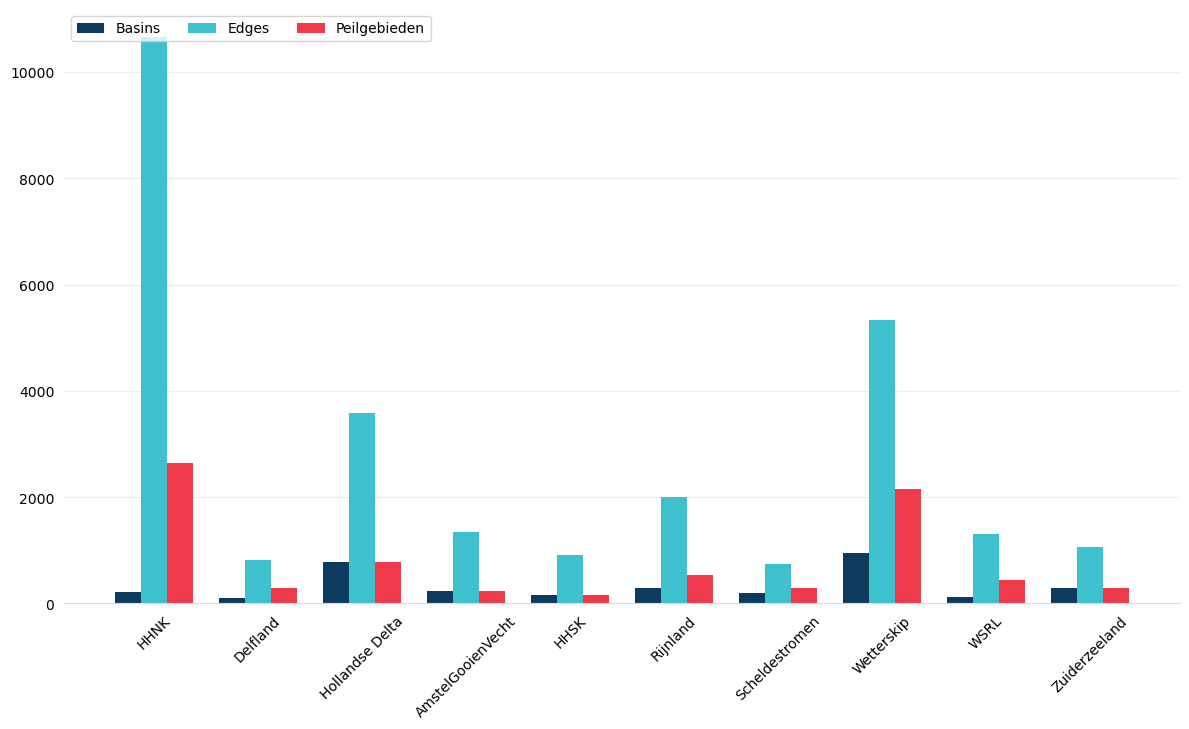

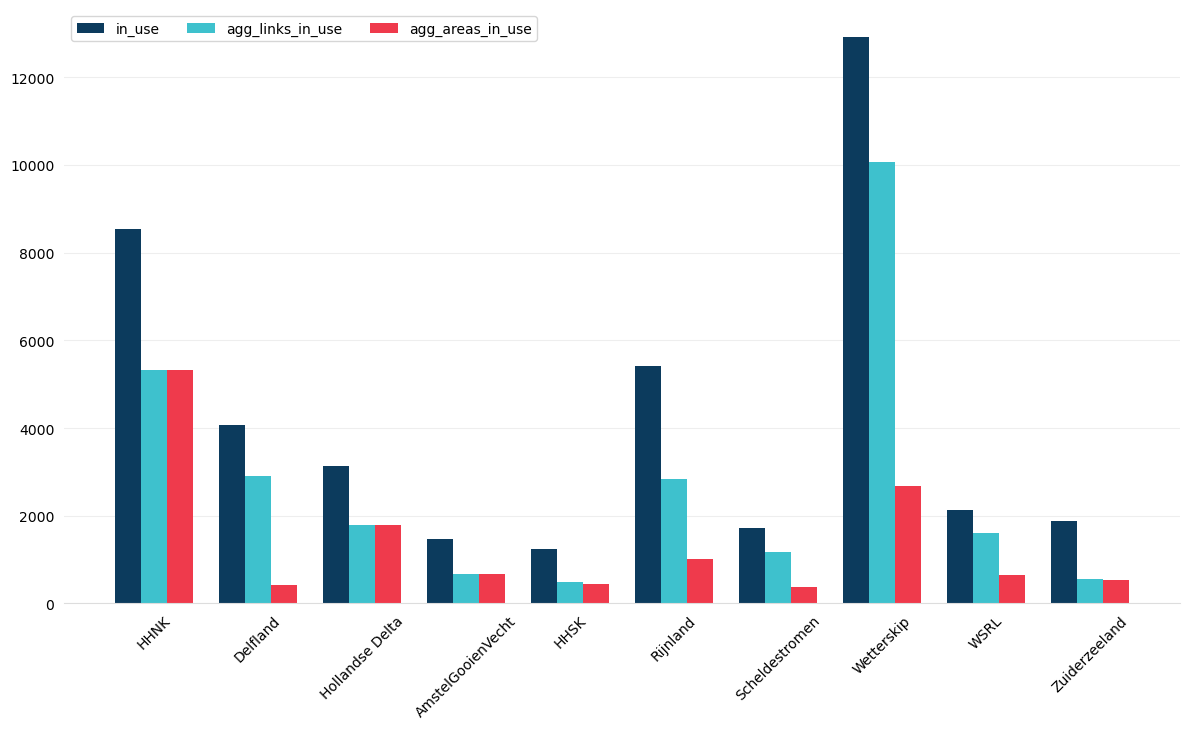

In [7]:
plt.close("all")
fig1, ax1 = plt.subplots(figsize=(12, 7.4), dpi=100)
fig2, ax2 = plt.subplots(figsize=(12, 7.4), dpi=100)

for ax in [ax1, ax2]:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_color("#dddddd")
    ax.tick_params(bottom=False, left=False)
    ax.yaxis.grid(True, color="#eeeeee")
    ax.xaxis.grid(False)

waterschappen = []
network_results = {"Basins": [], "Edges": [], "Peilgebieden": []}
# reduction_results = {"initial": [], "in_use": [], "agg_links_in_use": [], "agg_areas_in_use": []}
reduction_results = {"in_use": [], "agg_links_in_use": [], "agg_areas_in_use": []}
for waterschap, waterschap_struct in waterschap_data.items():
    init_settings, crossing_settings = waterschap_struct.values()
    df = gpd.read_file(init_settings["output_path"], layer="crossings_hydroobject_filtered")

    basins, edges, peilgebieden = None, None, None
    init_cross, cross_inuse, cross_agglinks, cross_aggareas = None, None, None, None
    try:
        sub_df = df[df.agg_areas_in_use].copy()
        all_nodes = np.hstack([sub_df.agg_area_from.to_numpy(), sub_df.agg_area_to.to_numpy()])
        basins = len(np.unique(all_nodes[~pd.isna(all_nodes)]))
        edges = len(sub_df) * 2
        all_peilgebieden = np.hstack([sub_df.peilgebied_from.to_numpy(), sub_df.peilgebied_to.to_numpy()])
        peilgebieden = len(np.unique(all_peilgebieden[~pd.isna(all_peilgebieden)]))

        init_cross = len(df)
        cross_inuse = len(df[df.in_use])
        cross_agglinks = len(df[df.agg_links_in_use])
        cross_aggareas = len(df[df.agg_areas_in_use])
    except Exception as e:
        print(f"{waterschap=}, {e=}")

    # reduction_results["initial"].append(init_cross)
    reduction_results["in_use"].append(cross_inuse)
    reduction_results["agg_links_in_use"].append(cross_agglinks)
    reduction_results["agg_areas_in_use"].append(cross_aggareas)
    
    network_results["Basins"].append(basins)
    network_results["Edges"].append(edges)
    network_results["Peilgebieden"].append(peilgebieden)
    waterschappen.append(waterschap)

colours = ['#0C3B5D', '#3EC1CD', '#EF3A4C', '#FCB94D']

x1 = np.arange(len(waterschappen))
width = 1 / (1 + len(network_results))
multiplier = 0
for multiplier, (attribute, measurement) in enumerate(network_results.items()):
    offset = width * multiplier
    rects = ax1.bar(x1 + offset, measurement, width, label=attribute, color=colours[multiplier])
    # ax1.bar_label(rects, padding=3)
ax1.set_axisbelow(True)
ax1.set_xticks(x1 + width, waterschappen, rotation=45)
ax1.legend(loc="upper left", ncols=len(network_results))


x2 = np.arange(len(waterschappen))
width = 1 / (1 + len(reduction_results))
for multiplier, (attribute, measurement) in enumerate(reduction_results.items()):
    offset = width * multiplier
    rects = ax2.bar(x2 + offset, measurement, width, label=attribute, color=colours[multiplier])
    # ax2.bar_label(rects, padding=3)
ax2.set_axisbelow(True)
ax2.set_xticks(x2 + width, waterschappen, rotation=45)
ax2.legend(loc="upper left", ncols=len(reduction_results))

fig1.tight_layout()
fig2.tight_layout()

fig1.savefig("network_results.jpeg", bbox_inches="tight")
fig2.savefig("reduction_results.jpeg", bbox_inches="tight")

display(pd.DataFrame(reduction_results, index=waterschappen))
display(pd.DataFrame(network_results, index=waterschappen))